Import necessary packages.

In [2]:
# import all functions from python labrary: sympy
from sympy import *
# import python library: matplotlib (for nice plots)
import matplotlib
# set sympy output to print pretty math expressions
init_printing()

Declare variables we are going to use as 'symbols'. We will add more along the way, if necessary.

In [3]:
q1, q2, p1, p2, y = symbols('q1 q2 p1 p2 y')

# 6. Quasi-linear utility function

For a general quasi-utility funciton $$ U(q_1,q_2) = u(q_1) + q_2, $$ we calculate its MRS, which is $$ MRS = \frac{U_1}{U_2} = u'(q_1) $$

In [4]:
### In sympy we can define a function without specifying its functional form
u = Function('u')(q1)
u

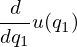

In [5]:
# we can take derivative with respect to this defined function
u.diff(q1)

In [6]:
# we can define a quasi-linear utility function using this u function 
#  (notice that we don't use u(q1) here to ask sympy to calculate any thing, otherwise there will be an error)
U = u + q2
U

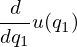

In [7]:
# we can then calculate the MRS of this quasi-linear utility funciton
U.diff(q1) / U.diff(q2)

## Setup the optimization program (general quasi-linear utility)

Our optimization problem is
\begin{align}
    & \max_{q_1,q_2}\quad U(q_1,q_2) = u(q_1) + q_2 \\
    \text{s.t.}\quad & p_1 q_1 + p_2 q_2 = y
\end{align}

## Setup the utility function

In [8]:
# define the non-linear part of the function
u = Function('u')(q1)

# define the quasi-linear utility function U
U = u + q2
# show the defined function
U

## Setup the lagrangian

In [9]:
lam = symbols('lambda')
lagr = U + lam *(y - p1*q1 - p2*q2)
lagr

Solve the first-order conditions. 

Note the syntax of the solve function, especially the use of the brackets:
solve( (eq1, eq2, eq3), var1, var2, var3)

The equations are by default treated as equal to 0 by the solver.

In [10]:
# sympy may not be able to find a solution for us
foc_sol = solve( ( diff(lagr,q1), diff(lagr,q2), diff(lagr,lam) ), q1,q2,lam)
foc_sol

## Setup the optimization program (a specific u function form)

Our optimization problem is
\begin{align}
    & \max_{q_1,q_2}\quad U(q_1,q_2) = u(q_1) + q_2 = ln(q_1) + q_2 \\
    \text{s.t.}\quad & p_1 q_1 + p_2 q_2 = y
\end{align}

## Setup the utility function

In [11]:
# define the non-linear part of the function
u = ln(q1)

# define the quasi-linear utility function U
U = u + q2
# show the defined function
U

## Setup the lagrangian

In [12]:
lam = symbols('lambda')
lagr = U + lam *(y - p1*q1 - p2*q2)
lagr

Solve the first-order conditions. 

Note the syntax of the solve function, especially the use of the brackets:
solve( (eq1, eq2, eq3), var1, var2, var3)

The equations are by default treated as equal to 0 by the solver.

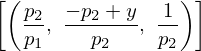

In [13]:
# sympy may not be able to find a solution for us
foc_sol = solve( ( diff(lagr,q1), diff(lagr,q2), diff(lagr,lam) ), q1,q2,lam)
foc_sol

The solution is a list with one element, because our solution is unique.

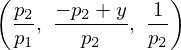

In [14]:
foc_sol[0]

To access the first element in our solution, which is a list by itself, we use the list index again.

In [15]:
q1star = foc_sol[0][0]
q1star

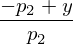

In [16]:
q2star = foc_sol[0][1]
q2star

 $q_1^*$ is clearly positive. We can discuss whether $q_2^*$ is positive.

In [17]:
# further declare that the exogenous variables are positive
p1, p2, y = symbols('p1 p2 y', positive=True)

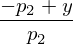

In [23]:
q2star

In [26]:
reduce_inequalities(q2star > 0, p2)

NotImplementedError: 
inequality has more than one symbol of interest.